# MEtodo de matriz inversa para la regresion lineal
$$Ax=b$$
$$A^TAx = A^T$$
$$x=(A^TA)^{-1}A^Tb$$

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
session = tf.Session()

In [21]:
x_vals = np.linspace(0,10,100)
y_vals = x_vals + np.random.normal(0,1,100)

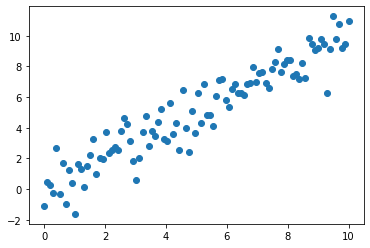

In [22]:
plt.plot(x_vals, y_vals, 'o', label="Datos")

In [8]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1,100)))
A = np.column_stack((x_vals_column,ones_column))
b = np.transpose(np.matrix(y_vals))#lo que se quiere predecir

In [9]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [10]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = session.run(solution)

In [11]:
solution_eval

array([[ 1.00949002],
       [-0.01753998]])

In [13]:
slope = solution_eval[0][0]
intercept = solution_eval[1][0]
print(str(np.round(slope,3)) + "x+" +str(np.round(intercept,3)))

1.009x+-0.018


In [14]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

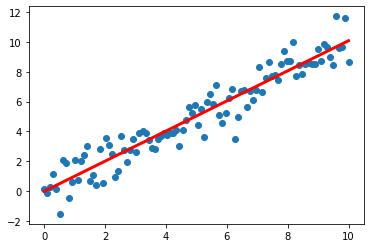

In [18]:
plt.plot(x_vals, y_vals, 'o', label="Datos")
plt.plot(x_vals,best_fit, 'r-',label="Regresion Lineal", linewidth = 3)
plt.show()

# Metodo de la descomposicion de Cholesky

$$A=LU$$
- L: matriz triangular superior
- U: matriz triangular inferior
- $ L^T=U $
$$ Ax=b $$

$$ A^TAx=A^Tb $$

$$ LUx = A^Tb $$

$$ Ly=A^Tb $$
$$ Ux=y $$

In [28]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [29]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [30]:
tA_a = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_a)
tA_b = tf.matmul(tf.transpose(A_tensor), b_tensor)
y_sol = tf.matrix_solve(L,tA_b)
x_sol = tf.matrix_solve(tf.transpose(L),y_sol)

In [33]:
sol_eval = session.run(x_sol)
sol_eval

array([[ 1.00949002],
       [-0.01753998]])

In [34]:
slope = sol_eval[0][0]
intercept = sol_eval[1][0]
print(str(np.round(slope,3)) + "x+" +str(np.round(intercept,3)))

1.009x+-0.018


In [35]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

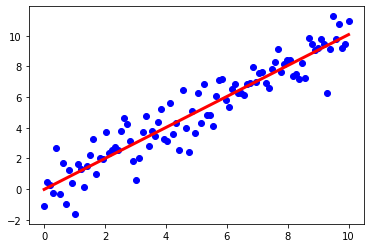

In [36]:
plt.plot(x_vals, y_vals, 'bo', label="Datos")
plt.plot(x_vals,best_fit, 'r-',label="Regresion Lineal", linewidth = 3)
plt.show()